# Importing the necessary dpendencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data collection and Analysis

In [2]:
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Medical insurance cost prediction/insurance.csv')

In [3]:
#print the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#print the last 5 rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#to get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#shape of the dataset
df.shape

(1338, 7)

# Data analysis

In [7]:
#statistical measure of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 576x576 with 0 Axes>

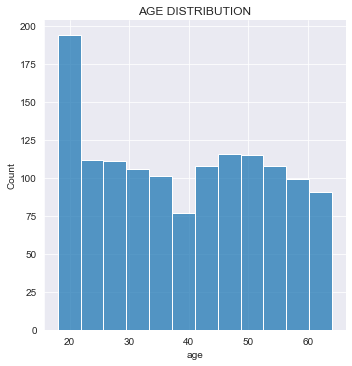

In [8]:
#distribution of age
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (8,8))
sns.displot(df['age'])
plt.title('AGE DISTRIBUTION')
plt.show()

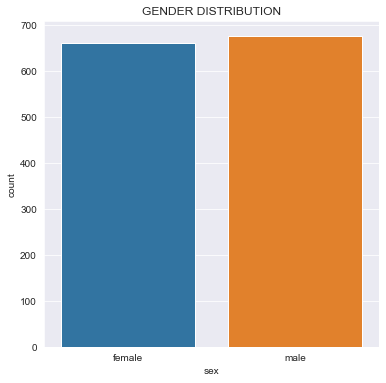

In [9]:
#For Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = df)
plt.title('GENDER DISTRIBUTION')
plt.show()

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 576x576 with 0 Axes>

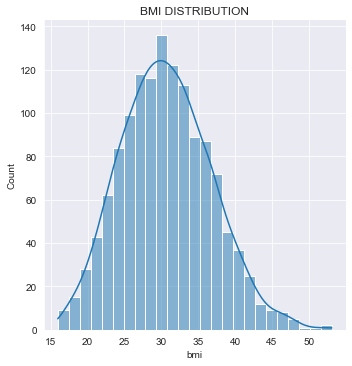

In [11]:
#BMI distribution
plt.figure(figsize = (8,8))
sns.displot(df['bmi'], kde = True)
plt.title('BMI DISTRIBUTION')
plt.show()

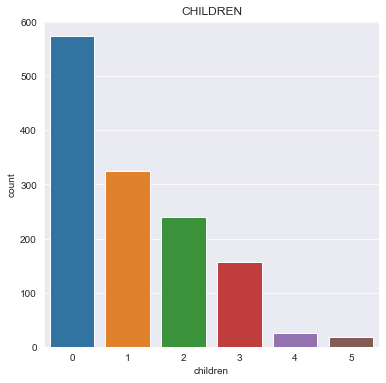

In [12]:
#for children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('CHILDREN')
plt.show()

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

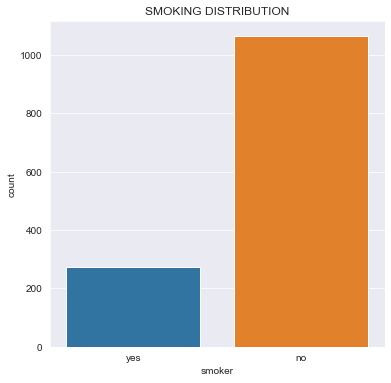

In [14]:
#for smoker
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('SMOKING DISTRIBUTION')
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

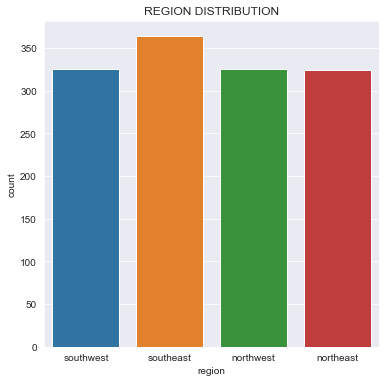

In [16]:
#region distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = df)
plt.title('REGION DISTRIBUTION')
plt.show()

<Figure size 576x576 with 0 Axes>

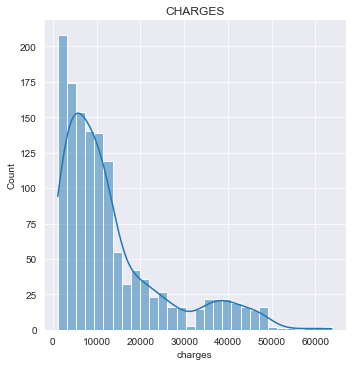

In [17]:
#Charges
plt.figure(figsize = (8,8))
sns.displot(df['charges'], kde = True)
plt.title('CHARGES')
plt.show()

# Data preprocessing

In [18]:
#encoding the categorical data
encoder = LabelEncoder()

In [19]:
objlist = df.select_dtypes(include = 'object').columns
for col in objlist:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Splitting the features and targets

In [21]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [22]:
print(X.shape, Y.shape)

(1338, 6) (1338,)


# Splitting the data and Model evaluation

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 2)

In [24]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1070, 6) (268, 6)
(1070,) (268,)


# Model training:

Linear Regression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train, y_train)

LinearRegression()

model evaluation :

R squared error

In [27]:
#on training data
training_prediction = model.predict(x_train)

training_evaluation = metrics.r2_score(training_prediction, y_train)
print('R SQUARED ERROR FOR TRAINING DATA :', training_evaluation)

R SQUARED ERROR FOR TRAINING DATA : 0.6701992676115633


In [28]:
#on testing data
testing_prediction = model.predict(x_test)

testing_evaluation = metrics.r2_score(testing_prediction, y_test)
print('R SQUARED ERROR FOR TESTING DATA :', testing_evaluation)

R SQUARED ERROR FOR TESTING DATA : 0.6621668246589307


XGB Regressor

In [29]:
model1 = XGBRegressor()

In [30]:
model1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model evaluation:

R Squared error

In [31]:
#on training data
training_prediction = model1.predict(x_train)

training_evaluation = metrics.r2_score(training_prediction, y_train)
print('R SQUARED ERROR FOR TRAINING DATA :', training_evaluation)

R SQUARED ERROR FOR TRAINING DATA : 0.9956419229368282


In [32]:
#on testing data
testing_prediction = model1.predict(x_test)

testing_evaluation = metrics.r2_score(testing_prediction, y_test)
print('R SQUARED ERROR FOR TESTING DATA :', testing_evaluation)

R SQUARED ERROR FOR TESTING DATA : 0.8004163582287668


# Building a predictive system

sw = 3
se = 2
nw = 1
ne = 0

In [35]:
model_input = input()
input_list = [float(i) for i in model_input.split(',')]
input_array = np.asarray(input_list)
reshaped_array = input_array.reshape(1, -1)

ls = [model, model1]
for i in ls:
    prediction = i.predict(reshaped_array)
    print(f'THE PREDICTED VALUE FOR {i} :\n', prediction)

60,0,25.84,0,0,1
THE PREDICTED VALUE FOR LinearRegression() :
 [11557.79188543]
THE PREDICTED VALUE FOR XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :
 [26412.803]
